In [256]:
import pandas as pd
import geopandas as gpd
import os
import pylab as plt
import emdat_data
from emdat_data import emdat
from importlib import reload
import datetime
import wbdata
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/nicholasjones/miniconda3/envs/GPD3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [220]:
        cols_dict = {"Year":"year",
        "Country":"country",
        "Dis No":"dis_no",
             "Total Deaths":"deaths",
             "Disaster Group":"disaster_group",
             "Disaster Type":"disaster_type",
             "Disaster Subgroup":"disaster_subgroup",
             "Disaster Subtype":"disaster_subtype",
             "Event Name":"event_name",
             "No Injured":"injured",
             "No Affected":"affected",
             "No Homeless":"homeless",
             "Total Affected":"total_affected",
             "Reconstruction Costs ('000 US$)":"reconstruction_costs",
             "Insured Damages ('000 US$)":"insured_damages",
             "Total Damages ('000 US$)":"total_damages"}

In [235]:
reload(emdat_data)
from emdat_data import emdat

In [222]:
data = os.getenv('data')

In [223]:
#df = pd.read_excel(data+'/emdat_1960.xlsx', header=6, parse_dates=['Year']).rename(columns = cols_dict)
#df.head(2)

,dis_no,year,Seq,disaster_group,disaster_subgroup,disaster_type,disaster_subtype,Disaster Subsubtype,event_name,Entry Criteria,...,End Day,deaths,injured,affected,homeless,total_affected,reconstruction_costs,insured_damages,total_damages,CPI
0,1960-0013-CHL,1960-01-01,13,Natural,Geophysical,Earthquake,Tsunami,NaN,NaN,Kill,...,22.0,6000.0,3000.0,2000000.0,NaN,2003000.0,NaN,NaN,550000.0,11.568216
1,1960-0026-AIA,1960-01-01,26,Natural,Meteorological,Storm,Tropical cyclone,NaN,Donna,Affect,...,4.0,5.0,250.0,NaN,1000.0,1250.0,NaN,NaN,35000.0,11.568216


In [224]:
df.shape

(23389, 43)

In [270]:
df = emdat((data + '/emdat_1960.xlsx'))

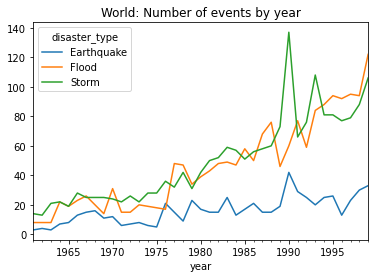

In [237]:
output = df.disaster_count_timeseries(1960, 2000, [], ['Storm','Flood', 'Earthquake'])
output.plot(title = 'World: Number of events by year');

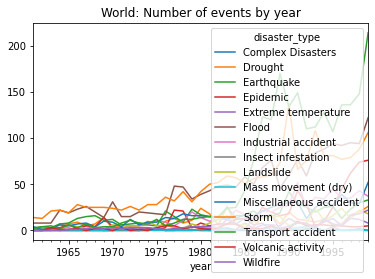

In [238]:
output = df.disaster_count_timeseries(1960, 2000, [], [])
output.plot(title = 'World: Number of events by year');

In [240]:
df.df.head(2)

,dis_no,year,Seq,disaster_group,disaster_subgroup,disaster_type,disaster_subtype,Disaster Subsubtype,event_name,Entry Criteria,...,End Day,deaths,injured,affected,homeless,total_affected,reconstruction_costs,insured_damages,total_damages,CPI
0,1960-0013-CHL,1960-01-01,13,Natural,Geophysical,Earthquake,Tsunami,NaN,NaN,Kill,...,22.0,6000.0,3000.0,2000000.0,NaN,2003000.0,NaN,NaN,550000.0,11.568216
1,1960-0026-AIA,1960-01-01,26,Natural,Meteorological,Storm,Tropical cyclone,NaN,Donna,Affect,...,4.0,5.0,250.0,NaN,1000.0,1250.0,NaN,NaN,35000.0,11.568216


In [242]:
df.df.shape

(23389, 43)

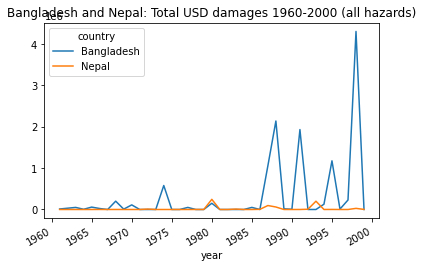

In [248]:
output = df.country_stats_timeseries(1960, 2000, ['Bangladesh','Nepal'],[],'total_damages')
output.plot(title = 'Bangladesh and Nepal: Total USD damages 1960-2000 (all hazards)');

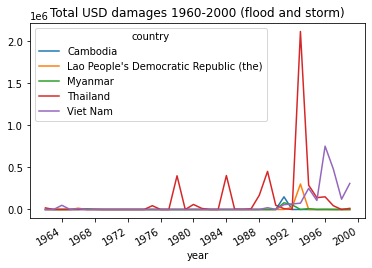

In [383]:
output = df.country_stats_timeseries(1960, 2000, ["Lao People's Democratic Republic (the)",'Cambodia','Thailand','Viet Nam','Myanmar'],['Flood','Storm'],'total_damages')
output.plot(title = 'Total USD damages 1960-2000 (flood and storm)');

In [384]:
output.head()

country,Cambodia,Lao People's Democratic Republic (the),Myanmar,Thailand,Viet Nam
year,,,,,
1962-01-01,0.0,0.0,0.0,19000.0,0.0
1963-01-01,0.0,0.0,0.0,0.0,0.0
1964-01-01,0.0,0.0,0.0,0.0,50000.0
1965-01-01,0.0,0.0,1000.0,0.0,0.0
1966-01-01,0.0,15300.0,0.0,1000.0,10000.0


In [163]:
output = x.disaster_stats_total_for_period(1960, 2000, countries = ['Peru','Colombia','Argentina'], disastertype = ['Storm','Flood'], stats = ['total_damages'])
output

total_damages    6712203.0
dtype: float64

In [76]:
df['Disaster Type'].unique()

array(['Earthquake', 'Storm', 'Transport accident', 'Flood', 'Landslide',
       'Miscellaneous accident', 'Drought', 'Extreme temperature',
       'Industrial accident', 'Mass movement (dry)', 'Wildfire',
       'Volcanic activity', 'Epidemic', 'Insect infestation',
       'Complex Disasters'], dtype=object)

In [380]:
def add_GDP(df):
    countries_not_in_WDI = ['ANT', 'AZO', 'CSK', 'DDR', 'DFR', 'SCG', 'SPI', 'SUN', 'YMD', 'YMN', 'YUG',
                    'AIA','FJI','GLP', 'COK', 'MTQ', 'NIU', 'TWN', 'TKL', 'ISL', 'OMN', 'REU', 'WLF', 'MSR', 'GUF', 'SHN', 'MYT', 'BLM']
    countries = [item for item in df.ISO.unique() if item not in countries_not_in_WDI]
    dates = df.year.min(), df.year.max()
    indicators = {'NY.GNP.MKTP.CD':'GNI_per_capita'}
    result = wbdata.get_dataframe(indicators,country=countries)
    #print(countries)
    #print(dates)
    return(result)

In [379]:
old_countries = ['ANT', 'AZO', 'CSK', 'DDR', 'DFR', 'SCG', 'SPI', 'SUN', 'YMD', 'YMN', 'YUG']
countries_not_in_WDI = ['ANT', 'AZO', 'CSK', 'DDR', 'DFR', 'SCG', 'SPI', 'SUN', 'YMD', 'YMN', 'YUG',
                    'AIA','FJI','GLP', 'COK', 'MTQ', 'NIU', 'TWN', 'TKL', 'ISL', 'OMN', 'REU', 'WLF', 'MSR', 'GUF', 'SHN', 'MYT', 'BLM']

In [385]:
wbdata.get_indicator(source=2)
#wbdata.get_data('NY.GNP.MKTP.CD',country='USA')
# wbdata.get_data("IC.BUS.EASE.XQ", country=["USA", "GBR"], data_date=data_date)
# data_date = datetime.datetime(1990,1,1), datetime.datetime(2000,1,1)


id                         name
-------------------------  --------------------------------------------------------------------------------------------------------------------------------------------
AG.AGR.TRAC.NO             Agricultural machinery, tractors
AG.CON.FERT.PT.ZS          Fertilizer consumption (% of fertilizer production)
AG.CON.FERT.ZS             Fertilizer consumption (kilograms per hectare of arable land)
AG.LND.AGRI.K2             Agricultural land (sq. km)
AG.LND.AGRI.ZS             Agricultural land (% of land area)
AG.LND.ARBL.HA             Arable land (hectares)
AG.LND.ARBL.HA.PC          Arable land (hectares per person)
AG.LND.ARBL.ZS             Arable land (% of land area)
AG.LND.CREL.HA             Land under cereal production (hectares)
AG.LND.CROP.ZS             Permanent cropland (% of land area)
AG.LND.EL5M.RU.K2          Rural land area where elevation is below 5 meters (sq. km)
AG.LND.EL5M.RU.ZS          Rural land area where elevation is below 5 met

In [302]:
indicators = {'NY.GNP.MKTP.CD':'GNI_per_capita'}  # GNI per capita current USD
#countries = ['USA','CAN']
foo = wbdata.get_dataframe(indicators, country=countries, convert_date=True)   

In [310]:
#df.df.country[df.df.ISO == 'CSK']

In [375]:
import requests
import json
response = json.loads(requests.get("https://raw.githubusercontent.com/lukes/ISO-3166-Countries-with-Regional-Codes/master/all/all.json").text)
ISOs = [item['alpha-3'] for item in response]
old_countries = set(countries).difference(set(ISOs))
print(old_countries)
df.df.country[df.df.ISO.isin(old_countries)].unique()

{'YMD', 'CSK', 'AZO', 'YMN', 'DDR', 'YUG', 'SUN', 'SPI', 'SCG', 'DFR', 'ANT'}


array(['Netherlands Antilles', 'Czechoslovakia', 'Germany Fed Rep',
       'Azores Islands', 'Germany Dem Rep', 'Soviet Union', 'Canary Is',
       'Yugoslavia', 'Yemen Arab Rep', 'Yemen P Dem Rep',
       'Serbia Montenegro'], dtype=object)

In [381]:
add_GDP(df.df)

GNI_per_capita
country     date                
Afghanistan 2020             NaN
            2019    1.940230e+10
            2018    1.967512e+10
            2017    2.044008e+10
            2016    1.954219e+10
...                          ...
Zimbabwe    1964    1.147750e+09
            1963    1.110952e+09
            1962    1.075907e+09
            1961    1.060136e+09
            1960    1.023338e+09

[12322 rows x 1 columns]

In [382]:
output

country,Cambodia,Lao People's Democratic Republic (the),Myanmar,Thailand,Viet Nam
year,,,,,
1962-01-01,0.0,0.0,0.0,19000.0,0.0
1963-01-01,0.0,0.0,0.0,0.0,0.0
1964-01-01,0.0,0.0,0.0,0.0,50000.0
1965-01-01,0.0,0.0,1000.0,0.0,0.0
1966-01-01,0.0,15300.0,0.0,1000.0,10000.0
1967-01-01,0.0,0.0,8200.0,0.0,0.0
1968-01-01,0.0,1280.0,2500.0,0.0,0.0
1969-01-01,0.0,0.0,0.0,0.0,0.0
1970-01-01,0.0,0.0,0.0,0.0,0.0


In [378]:
countries = [item for item in df.df.ISO.unique() if item not in countries_not_in_WDI]
for country in countries:
    try:
        wbdata.get_data('NY.GNP.MKTP.CD',country=country)
    except:
        print("{} failed".format(country))

AIA failed
FJI failed
GLP failed
COK failed
MTQ failed
NIU failed
TWN failed
TKL failed
ISL failed
OMN failed
REU failed
WLF failed
MSR failed
GUF failed
SHN failed
MYT failed
BLM failed


In [90]:
x.df.columns

Index(['Dis No', 'year', 'Seq', 'disaster_group', 'disaster_subgroup',
       'disaster_type', 'disaster_subtype', 'Disaster Subsubtype',
       'event_name', 'Entry Criteria', 'Region', 'Location', 'Origin',
       'Associated Dis', 'Associated Dis2', 'OFDA Response', 'Appeal',
       'Declaration', 'Aid Contribution', 'Dis Mag Value', 'Dis Mag Scale',
       'Latitude', 'Longitude', 'Local Time', 'River Basin', 'Start Year',
       'Start Month', 'Start Day', 'End Year', 'End Month', 'End Day',
       'deaths', 'injured', 'affected', 'homeless', 'total_affected',
       'reconstruction_costs', 'insured_damages', 'total_damages', 'CPI'],
      dtype='object')

In [93]:
sorted(df.columns.tolist())

['Aid Contribution',
 'Appeal',
 'Associated Dis',
 'Associated Dis2',
 'CPI',
 'Declaration',
 'Dis Mag Scale',
 'Dis Mag Value',
 'Dis No',
 'Disaster Group',
 'Disaster Subgroup',
 'Disaster Subsubtype',
 'Disaster Subtype',
 'Disaster Type',
 'End Day',
 'End Month',
 'End Year',
 'Entry Criteria',
 'Event Name',
 "Insured Damages ('000 US$)",
 'Latitude',
 'Local Time',
 'Location',
 'Longitude',
 'No Affected',
 'No Homeless',
 'No Injured',
 'OFDA Response',
 'Origin',
 "Reconstruction Costs ('000 US$)",
 'Region',
 'River Basin',
 'Seq',
 'Start Day',
 'Start Month',
 'Start Year',
 'Total Affected',
 "Total Damages ('000 US$)",
 'Total Deaths',
 'Year']